# Working with datetime in Pandas DataFrame

In [50]:
import pandas as pd
import numpy as np

### 1. Dates and Times in Python
Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [69]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [54]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("4th of July, 2015"))
print(parser.parse("07/04/2015"))
print(parser.parse("07/04/2015", dayfirst=True))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-04-07 00:00:00


In [5]:
print(parser.parse("7/4/2015"))
print(parser.parse("07-04-2015"))
print(parser.parse("2015-07-04"))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-07-04 00:00:00


Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [57]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2015, month = 7, day = 4).strftime('%w')

'6'

### 2. Dates and Times in numpy

In [58]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [65]:
np.array('07-04-2015', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [59]:
date

array('2015-07-04', dtype='datetime64[D]')

In [60]:
np.arange(14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [12]:
dates = date + np.arange(12)
dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Here is a minute-based datetime:

In [14]:
np.datetime64('2015-07-04 12:00:30')

numpy.datetime64('2015-07-04T12:00:30')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time.

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Dates and Times in Pandas

#### Default arguments

In [61]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

,date,value
0,3/10/2000,2
1,3/11/2000,3
2,3/12/2000,4


In [24]:
df.dtypes

date     object
value     int64
dtype: object

In [25]:
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [26]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Day first format

In [27]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


#### Custom format 

In [67]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

,date,value
0,2016-06-10 20:30:00,2
1,2016-07-01 19:45:30,3
2,2013-10-12 04:05:01,4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


#### Handle parsing error

In [28]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ParserError: Unknown string format: a/11/2000

In [70]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df.dtypes

date     object
value     int64
dtype: object

In [71]:
df

,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [72]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [32]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [73]:
print(df.at[0, 'date'])
print(df.at[1, 'date'])

2000-03-10 00:00:00
NaT


### 4. Assemble a datetime from multiple columns

In [34]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

,year,month,day
0,2015,2,4
1,2016,3,5


In [35]:
df['date'] = pd.to_datetime(df)

In [55]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [56]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Get year, month and day

In [74]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [37]:
df['year'] = df['DoB'].dt.year
df['month'] = df['DoB'].dt.month
df['day'] = df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [41]:
df.dtypes

name             object
DoB      datetime64[ns]
year              int64
month             int64
day               int64
dtype: object

### 6. Get the week of year, the day of week and leap year

In [38]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,1997,8,5,32,1,False
1,Andy,1996-04-28,1996,4,28,17,6,True
2,Lucas,1995-12-16,1995,12,16,50,5,False


In [43]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,day_of_week_name
0,Tom,1997-08-05,1997,8,5,Tuesday
1,Andy,1996-04-28,1996,4,28,Sunday
2,Lucas,1995-12-16,1995,12,16,Saturday


### 7. Get the age from the date of birth

In [76]:
pd.to_datetime('today')

Timestamp('2023-06-27 12:15:35.238238')

In [77]:
datetime.today()

datetime.datetime(2023, 6, 27, 12, 15, 36, 159703)

In [78]:
today = pd.to_datetime('today')
df['age'] = today.year - df['DoB'].dt.year

df

,name,DoB,age
0,Tom,1997-08-05,26
1,Andy,1996-04-28,27
2,Lucas,1995-12-16,28


### 8. Improve performance by setting date column as the index 

In [37]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1795139,2019-01-31 15:56:00,3,Cambridge
1795140,2019-01-31 15:57:00,3,Cambridge
1795141,2019-01-31 15:58:00,3,Cambridge
1795142,2019-01-31 15:59:00,3,Cambridge


In [79]:
df.describe(include='all')

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,name,DoB,age
count,3,3,3.0
unique,3,3,NaN
top,Tom,1997-08-05 00:00:00,NaN
freq,1,1,NaN
first,NaN,1995-12-16 00:00:00,NaN
last,NaN,1997-08-05 00:00:00,NaN
mean,NaN,NaN,27.0
std,NaN,NaN,1.0
min,NaN,NaN,26.0
25%,NaN,NaN,26.5


In [80]:
4*448786

1795144

In [81]:
df.dtypes

name            object
DoB     datetime64[ns]
age              int64
dtype: object

In [82]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [39]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [83]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [84]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Select data with a specific year and perform aggregation

In [40]:
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [71]:
df.loc['2018', 'num'].head()

date
2018-01-01 09:00:00    2
2018-01-01 09:01:00    1
2018-01-01 09:02:00    3
2018-01-01 09:03:00    3
2018-01-01 09:04:00    3
Name: num, dtype: int64

In [72]:
df.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


### 10. Select data with a specific month or a specific day of the month

In [85]:
df.loc['2018-5'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [86]:
df.loc['2018-5-1'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [87]:
cond = df.index.month == 2
df[cond].head()

,num,city
date,,
2015-02-02 09:00:00,4,London
2015-02-02 09:01:00,3,London
2015-02-02 09:02:00,3,London
2015-02-02 09:03:00,2,London
2015-02-02 09:04:00,1,London


### 11. Select data between two dates

In [95]:
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [96]:
df.loc['2016':'2018']

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


,num,city
date,,
2016-01-01 09:00:00,4,London
2016-01-01 09:01:00,3,London
2016-01-01 09:02:00,4,London
2016-01-01 09:03:00,4,London
2016-01-01 09:04:00,2,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [99]:
df.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
2018-05-02 10:02:00,4,London
2018-05-02 10:03:00,4,London
2018-05-02 10:04:00,4,London
...,...,...
2018-05-02 11:55:00,3,Cambridge
2018-05-02 11:56:00,3,Cambridge
2018-05-02 11:57:00,4,Cambridge


In [100]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:31:00,3,London
2018-05-02 10:32:00,1,London
2018-05-02 10:33:00,3,London
2018-05-02 10:34:00,3,London
...,...,...
2018-05-02 10:41:00,3,Cambridge
2018-05-02 10:42:00,3,Cambridge
2018-05-02 10:43:00,3,Cambridge


In [101]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:31:00,3,London
2015-01-01 10:32:00,3,London
2015-01-01 10:33:00,3,London
2015-01-01 10:34:00,4,London
...,...,...
2019-01-31 10:41:00,3,Cambridge
2019-01-31 10:42:00,3,Cambridge
2019-01-31 10:43:00,1,Cambridge


In [102]:
df.shape

(1795144, 2)

### 12. Operations with dates

In [103]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [109]:
from pandas.tseries.offsets import DateOffset, BDay

print(df['DoB'] + DateOffset(days = 5))
print(df['DoB'] + DateOffset(days = -5))
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]
0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]
0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [110]:
BDay(10)

<10 * BusinessDays>

In [83]:
print(df['DoB'])
print(df['DoB'] + BDay(10))

0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


In [111]:
df['DoB+10BD'] = df['DoB'] + BDay(10)
df

,name,DoB,DoB+10BD
0,Tom,1997-08-05,1997-08-19
1,Andy,1996-04-28,1996-05-10
2,Lucas,1995-12-16,1995-12-29


In [112]:
df['date_diff'] = (df['DoB+10BD'] - df['DoB']).dt.days
df

,name,DoB,DoB+10BD,date_diff
0,Tom,1997-08-05,1997-08-19,14
1,Andy,1996-04-28,1996-05-10,12
2,Lucas,1995-12-16,1995-12-29,13


In [113]:
df.dtypes

name                 object
DoB          datetime64[ns]
DoB+10BD     datetime64[ns]
date_diff             int64
dtype: object

### 13. Regular sequences: ``pd.date_range()``

To make the creation of **regular date** sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that **Python's ``range()`` and NumPy's ``np.arange()``** turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [93]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [94]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

In [95]:
pd.date_range('2015-01-01', periods = 12, freq='M')

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

### 14. Handle missing values

In [124]:
# Creamos algunos missings aposta con la rolling window
df = pd.read_csv('data/city_sales.csv', parse_dates=['date'], index_col='date')
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [125]:
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,num,city,rolling_sum
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,11.0
2015-01-01 09:03:00,3,London,10.0
2015-01-01 09:04:00,3,London,9.0


In [126]:
df['rolling_sum_back'] = df['rolling_sum'].fillna(method = 'backfill')
df.head()

,num,city,rolling_sum,rolling_sum_back
date,,,,
2015-01-01 09:00:00,4,London,NaN,11.0
2015-01-01 09:01:00,4,London,NaN,11.0
2015-01-01 09:02:00,3,London,11.0,11.0
2015-01-01 09:03:00,3,London,10.0,10.0
2015-01-01 09:04:00,3,London,9.0,9.0


In [128]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 12]})
  
# Print the dataframe
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,12.0


In [129]:
df.interpolate(method = 'linear')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,6.0
3,3.0,3.0,3.0,9.0
4,1.0,3.0,8.0,12.0


### 15. Resampling, Windowing and Shifting

In [130]:
goog = pd.read_csv('data/GOOG.csv')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [131]:
goog.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
2010-01-11,301.101410,301.101410,295.910858,299.432648,299.432648,14479800
2010-01-12,297.709106,297.963165,292.902130,294.137512,294.137512,9742900
2010-01-13,287.168610,293.091431,285.878448,292.448822,292.448822,13041800
2010-01-14,290.859772,295.990540,290.316833,293.823669,293.823669,8511900


In [132]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-01-04 to 2020-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [133]:
# goog = goog['Close']
goog = goog.fillna(method='ffill')
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


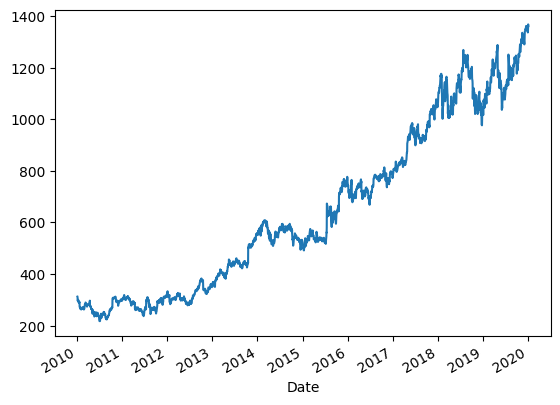

In [43]:
goog['Close'].plot();

In [69]:
goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [161]:
goog.resample('BA').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,267.154630,269.464070,264.402920,266.811472,266.811472,6.383553e+06
2011-12-30,283.523139,286.110425,280.751839,283.424738,283.424738,6.179412e+06
2012-12-31,320.195071,322.927847,317.288286,320.208021,320.208021,5.228172e+06
2013-12-31,440.160271,443.407307,437.217431,440.470378,440.470378,4.190346e+06
2014-12-31,560.709645,564.495206,555.162255,559.803290,559.803290,2.487038e+06
2015-12-31,602.057314,607.442765,596.090603,602.005681,602.005681,2.069434e+06
2016-12-30,743.732459,749.421629,737.597905,743.486707,743.486707,1.832266e+06
2017-12-29,921.121193,926.898963,915.331412,921.780837,921.780837,1.476514e+06
2018-12-31,1113.554101,1125.777606,1101.001658,1113.225134,1113.225134,1.741965e+06


In [139]:
goog.loc['2010-12-31']

Open         2.972558e+02
High         2.980927e+02
Low          2.949096e+02
Close        2.958760e+02
Adj Close    2.958760e+02
Volume       3.090000e+06
Name: 2010-12-31 00:00:00, dtype: float64

In [140]:
goog.loc['2010', 'Open'].mean()

267.1546304563492

In [141]:
goog.asfreq('BA')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [142]:
goog.loc['2020']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400


In [143]:
goog.loc['2012-12-31']

Open         3.486930e+02
High         3.539583e+02
Low          3.467005e+02
Close        3.523692e+02
Adj Close    3.523692e+02
Volume       4.009600e+06
Name: 2012-12-31 00:00:00, dtype: float64

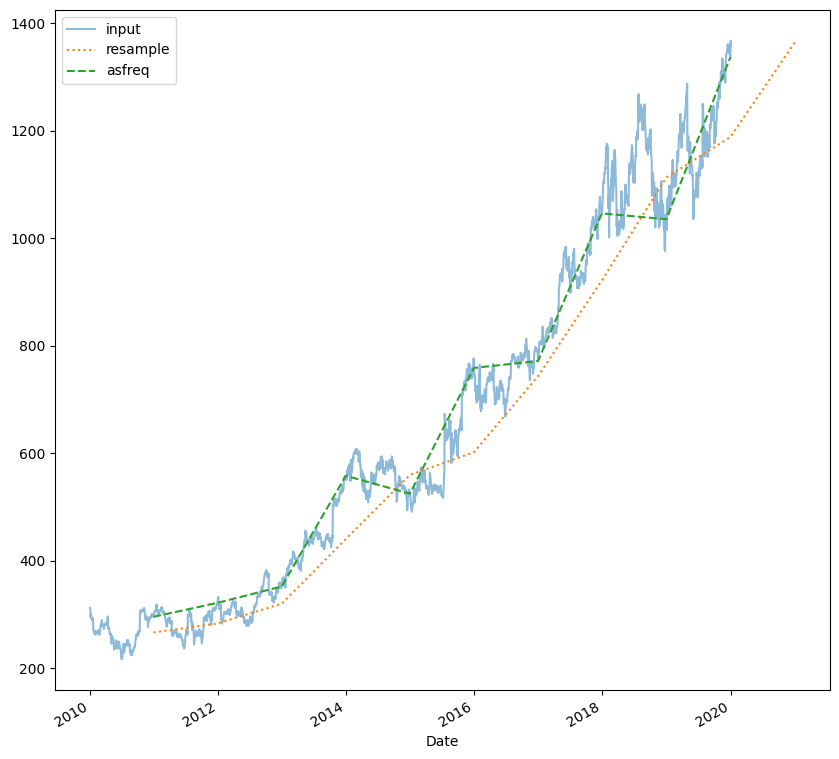

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BA').mean().plot(style=':')
goog['Close'].asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [164]:
print(goog.resample('BA').mean().iloc[::, -1])
goog.loc['2020'].mean()

Date
2010-12-31    6.383553e+06
2011-12-30    6.179412e+06
2012-12-31    5.228172e+06
2013-12-31    4.190346e+06
2014-12-31    2.487038e+06
2015-12-31    2.069434e+06
2016-12-30    1.832266e+06
2017-12-29    1.476514e+06
2018-12-31    1.741965e+06
2019-12-31    1.414085e+06
2020-12-31    1.296500e+06
Freq: BA-DEC, Name: Volume, dtype: float64


Open         1.344705e+03
High         1.370320e+03
Low          1.343547e+03
Close        1.364015e+03
Adj Close    1.364015e+03
Volume       1.296500e+06
dtype: float64

In [97]:
goog.asfreq('BA')

Date
2010-12-31     295.875977
2011-12-30     321.744019
2012-12-31     352.369232
2013-12-31     558.262512
2014-12-31     524.958740
2015-12-31     758.880005
2016-12-30     771.820007
2017-12-29    1046.400024
2018-12-31    1035.609985
2019-12-31    1337.020020
Freq: BA-DEC, Name: Close, dtype: float64

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |